## Using Statistical Learning To Answer A Business Question

## UCT-DSS-2024-01-29

# 

# 

## PART 1: SUPERVISED LEARNING; A Tree-Based Model

## 1.1 Import Libraries

In [3]:
# Import libraries
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# For tree-based model 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error



## 1.2 Import and explore the insurance claim data

In [9]:
# Import data
df = pd.read_csv('ClaimsData.csv', sep=",")

# 

In [10]:
# Explore the size of the data set
df.shape

(1500, 7)

#### *The data set consists of one thousand and five hundred rows of records, and 7 columbs of features. Amongs these features we have the response variable, 'Claim'.

# 

In [11]:
# Explore type of data and feature names
df.head()

,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes
1,24097.69,SAV,63926.9,43,2018,No,No
2,19190.63,Small,134829.8,28,2018,No,Yes
3,20574.27,Small,59107.4,28,2018,No,Yes
4,26734.33,SAV,132746.9,22,2017,No,Yes


# 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Claim      1500 non-null   float64
 1   Category   1500 non-null   object 
 2   Mileage    1500 non-null   float64
 3   AgeP       1500 non-null   int64  
 4   ModelYear  1500 non-null   int64  
 5   PreOwned   1500 non-null   object 
 6   ServHist   1500 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 82.2+ KB


 ## 1.3 Plot the data

**a) Visualise the continuous variables on a scatterplot**

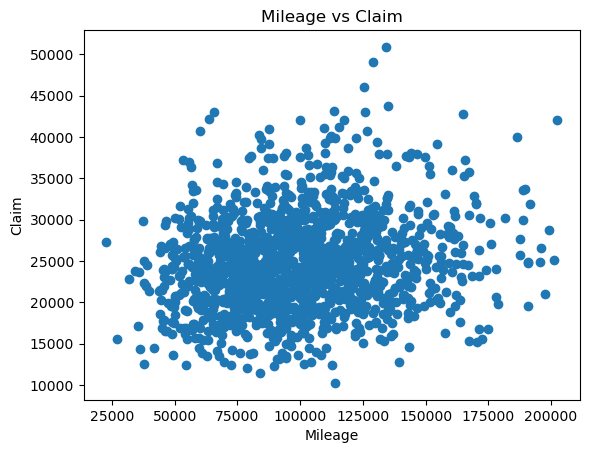

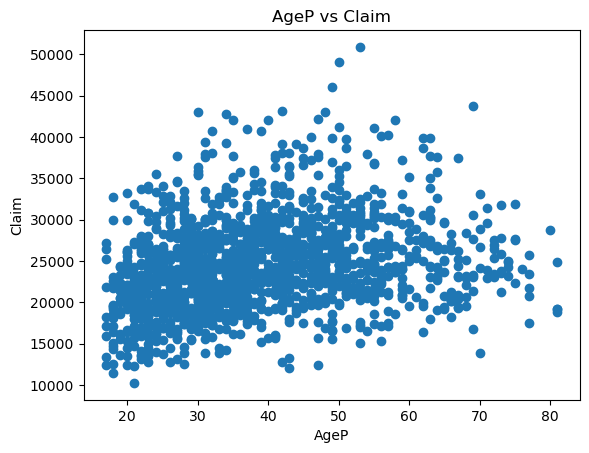

In [13]:
# Plot a scatterplot of y vs the continuous variables (Mileage and AgeP)
plt.scatter(df.loc[:,"Mileage"],df.loc[:,"Claim"])
plt.title('Mileage vs Claim')
plt.ylabel('Claim')
plt.xlabel('Mileage')
plt.show()

plt.scatter(df.loc[:,"AgeP"],df.loc[:,"Claim"])
plt.title('AgeP vs Claim')
plt.ylabel('Claim')
plt.xlabel('AgeP')
plt.show()

#### *The exploratory data analysis reveals insights as follows. Looking at the scatterplot we observe a positive correlation on both plots, claim versus mileage of the car in kilometres, and claim versus age of the primary driver of the vehicle in years.

#### *The scatterplot, claim versus mileage suggest that cars that travel further (cars with a higher mileage) tend to have larger claims, possibly due to increased likelihood of breakdowns. Scatterplot, claim versus the age of the primary driver of the vehicle suggests that older clients tend to have larger claims.

# 

**b) Compare the mean claim amount for categorical variables**  

In [17]:
# Calculate the mean claim amount of pre-owned and not pre-owned vehicles
df.groupby('PreOwned')['Claim'].mean().round(2)

PreOwned
No     23435.09
Yes    26987.04
Name: Claim, dtype: float64

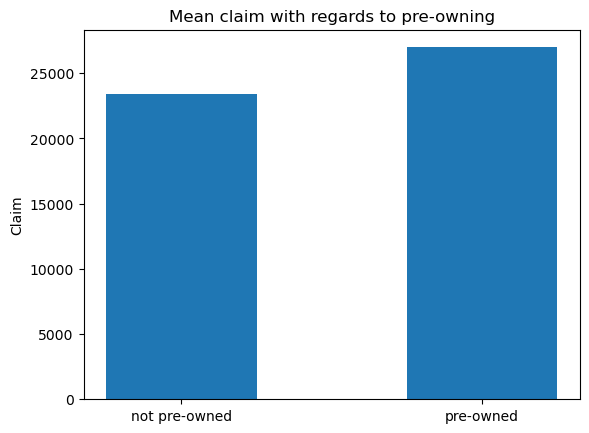

In [18]:
# Plot the pre-owned vs non-pre-owned vehicles
not_preowned = df.groupby('PreOwned')['Claim'].mean()[0]
preowned = df.groupby('PreOwned')['Claim'].mean()[1]

plt.bar(np.arange(2), [not_preowned, preowned], width=0.5)
plt.xticks(np.arange(2),("not pre-owned", "pre-owned"))
plt.title('Mean claim with regards to pre-owning')
plt.ylabel('Claim')

plt.show()

In [22]:
# Calculate the mean claim amount of vehicles with and without service histories
df.groupby('ServHist')['Claim'].mean().round(2)

ServHist
No     24368.47
Yes    24780.54
Name: Claim, dtype: float64

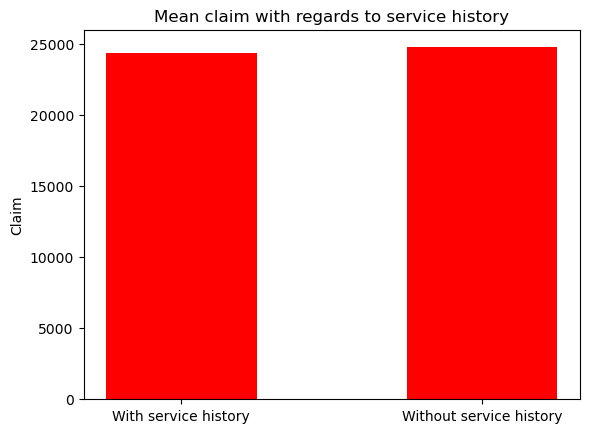

In [23]:
# Plot the mean claim amount of vehicles with and without service histories
no_servhist = df.groupby('ServHist')['Claim'].mean()[0]
servhist = df.groupby('ServHist')['Claim'].mean()[1]

plt.bar(np.arange(2), [no_servhist, servhist],color="red", width=0.5)
plt.xticks(np.arange(2),("With service history", "Without service history"))
plt.title('Mean claim with regards to service history')
plt.ylabel('Claim')

plt.show()

In [21]:
# Calculate the mean claim amount of vehicles in each category
df.groupby('Category')['Claim'].mean().round(2)

Category
SAV      25567.22
SUV      29439.96
Sedan    23759.34
Small    21458.09
Super    33107.50
Name: Claim, dtype: float64

In [86]:
# Calculate the mean claim amount of vehicles for each model year
df.groupby('ModelYear')['Claim'].mean().round(2)

ModelYear
2011    21251.20
2012    22089.08
2013    22797.42
2014    24559.40
2015    24396.63
2016    24930.40
2017    24859.32
2018    24844.63
2019    25487.11
Name: Claim, dtype: float64

#### *Observing the bar graphs, this shows the mean claim of categories, pre-owned (if a car was previously owned by another individual or not) and service history (if service history is available for the vehicle or not). The mean claim with regards to pre-owning indicates that cars that where pre-owned have a larger mean claim than those that are not pre-owned. This suggests that pre-owned cars are more prone to breakdown. The mean claim with regards to service history shows that both cars with or without service history have about the same mean claim, suggesting that the service history of the car is not much of an impact to customer's claim.

#### *Categories, like model year indicates that the recent the model, the higher the claim, moreover, luxury vehicles have a higher claim than other types of cars, followed by sports utility vehicles. The difference in mean claim amounts across categories suggests that certain car makes or models are more expensive to repair or more prone to accidents.

## 1.4 Prepare the data

In [24]:
# Check that there are no missing values
print(df.isnull().sum()) 

Claim        0
Category     0
Mileage      0
AgeP         0
ModelYear    0
PreOwned     0
ServHist     0
dtype: int64


In the next cell, you will one-hot encode the `Category` variable. Recall one hot encoding was performed in the 3.6 IDE activity in the M3U3 notebook. You may also refer to the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [user guide](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

In [25]:
X = df.loc[: , ["Claim", "Mileage", "AgeP"]]
all_vars = list(X.columns)

df_to_use1 = df.loc[:, all_vars]
print(df_to_use1.isnull().sum()) 


# One-hot encode the "Category" variable and add the encoded feature to the dataframe 
# Name the new columns (hint: columns = ohe.get_feature_names_out())
### BEGIN SOLUTION
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(df.Category.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ["Category_"+str(int(i)) for i in range(Xd.shape[1])])
### END SOLUTION

# Add encoded feature to the dataframe and view the new dataframe with .head()
### BEGIN SOLUTION
df_to_use2 = pd.concat([df_to_use1, df_ohe], axis=1)
df_to_use2.head()
### END SOLUTION

Claim      0
Mileage    0
AgeP       0
dtype: int64


,Claim,Mileage,AgeP,Category_0,Category_1,Category_2,Category_3,Category_4
0,42089.53,99754.4,40,0.0,0.0,1.0,0.0,0.0
1,24097.69,63926.9,43,1.0,0.0,0.0,0.0,0.0
2,19190.63,134829.8,28,0.0,0.0,0.0,1.0,0.0
3,20574.27,59107.4,28,0.0,0.0,0.0,1.0,0.0
4,26734.33,132746.9,22,1.0,0.0,0.0,0.0,0.0


Choose the following variables as features: `Mileage`, `AgeP`, and `Category0` to `Category4`. You may use the `.loc[]` or `.iloc[]` method.


In [26]:
# Split data into features (X) and response (y) 
### BEGIN SOLUTION
X = df_to_use2.iloc[:, 1:7]
y = df_to_use2.loc[:, ["Claim"]]
### END SOLUTION

In [28]:
X.head()

,Mileage,AgeP,Category_0,Category_1,Category_2,Category_3
0,99754.4,40,0.0,0.0,1.0,0.0
1,63926.9,43,1.0,0.0,0.0,0.0
2,134829.8,28,0.0,0.0,0.0,1.0
3,59107.4,28,0.0,0.0,0.0,1.0
4,132746.9,22,1.0,0.0,0.0,0.0


In [29]:
y.head()

,Claim
0,42089.53
1,24097.69
2,19190.63
3,20574.27
4,26734.33


## 1.5 Split the data into a training and test set

In [30]:
# Split the data into the training set and test set 
# Set random_state=0
### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
### END SOLUTION

# Fit data to tree-based model
# Set random_state=0
### BEGIN SOLUTION
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
### END SOLUTION

# What is the mean squared error (MSE) prior to pruning?
# Assign the MSE to the variable name "error"
### BEGIN SOLUTION
y_pred = reg.predict(X_test)
error = mean_squared_error(y_pred, y_test)
### END SOLUTION

# Print the MSE before pruning
print("MSE:", error)

MSE: 52969205.268238395


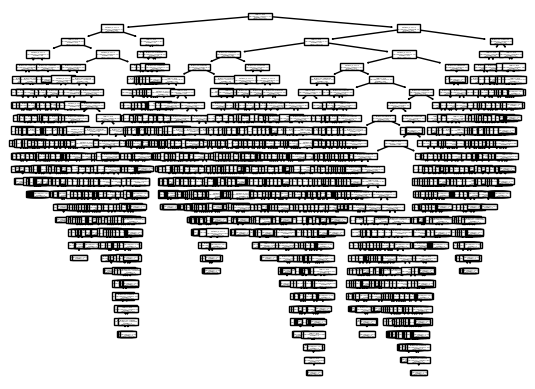

In [31]:
# Plot the unpruned tree
plt.figure()
plot_tree(reg, feature_names=list(X.columns))
plt.show()

In [32]:
# Replace "reg" with the variable name you chose in "Fit data to tree-based model" above
print("Tree depth =",reg.get_depth(),'\n'
      "Number of leaves =",reg.get_n_leaves())

Tree depth = 28 
Number of leaves = 1125


In [33]:
# Finding the optimal number of leaf nodes
nodes = [node for node in range(2,35)]     

regs = []
for node in nodes:
    reg2 = DecisionTreeRegressor(random_state=0, 
                                         max_leaf_nodes=node)
    reg2.fit(X_train, y_train)
    regs.append(reg2)

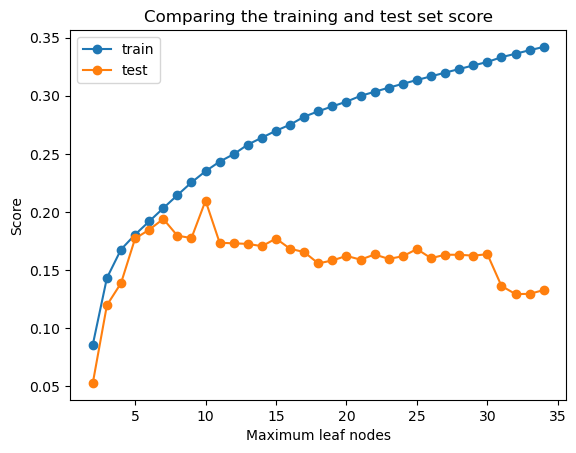

In [34]:
# Visualise the performance of each subtree on the training and test set
train_scores = [reg.score(X_train, y_train) for reg in regs]
test_scores = [reg.score(X_test, y_test) for reg in regs]

fig, ax = plt.subplots()
ax.set_xlabel("Maximum leaf nodes")
ax.set_ylabel("Score")
ax.set_title("Comparing the training and test set score")
ax.plot(nodes, train_scores, marker='o', label="train")
ax.plot(nodes, test_scores, marker='o', label="test")
ax.legend()
plt.show()

In [35]:
# To find the optimal maximum leaf nodes, cross validation is applied
validation_scores = []
for node in nodes:
    reg3 = DecisionTreeRegressor(random_state=0, max_leaf_nodes=node)
    score = cross_val_score(estimator=reg3, X=X_train, y=y_train, cv=5)   
    validation_scores.append(score.mean())

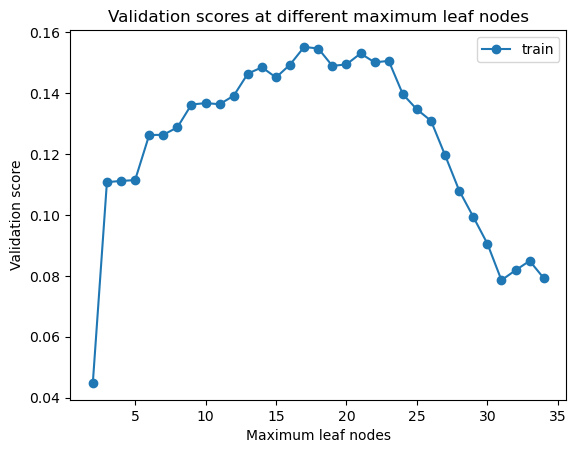

In [36]:
# Visualise the validation score in relation to maximum leaf nodes
plt.figure()
plt.xlabel("Maximum leaf nodes")
plt.ylabel("Validation score")
plt.title("Validation scores at different maximum leaf nodes")
plt.plot(nodes, validation_scores, marker='o', label="train")
plt.legend()
plt.show()

In [37]:
# Obtain the maximum leaf nodes with the highest validation score
nodes_optimum = nodes[validation_scores.index(max(validation_scores))]
print(nodes_optimum)

17


In [38]:
# Use the optimum maximum leaf nodes to fit a parsimonious tree 
# Set random_state=0
### BEGIN SOLUTION
reg4 = DecisionTreeRegressor(random_state=0, min_samples_leaf=nodes_optimum)
reg4.fit(X_train, y_train)
### END SOLUTION

DecisionTreeRegressor(min_samples_leaf=17, random_state=0)

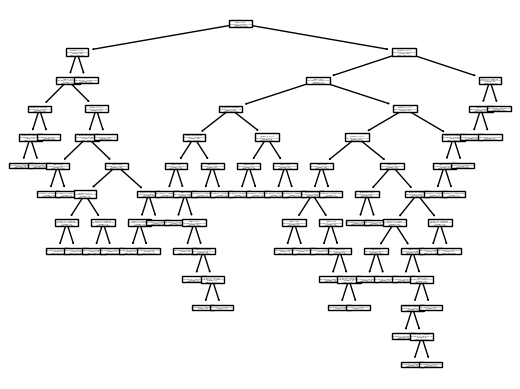

In [39]:
# Visualise the smaller pruned tree
plt.figure()
plot_tree(reg4, feature_names=list(X_train.columns))
plt.show()

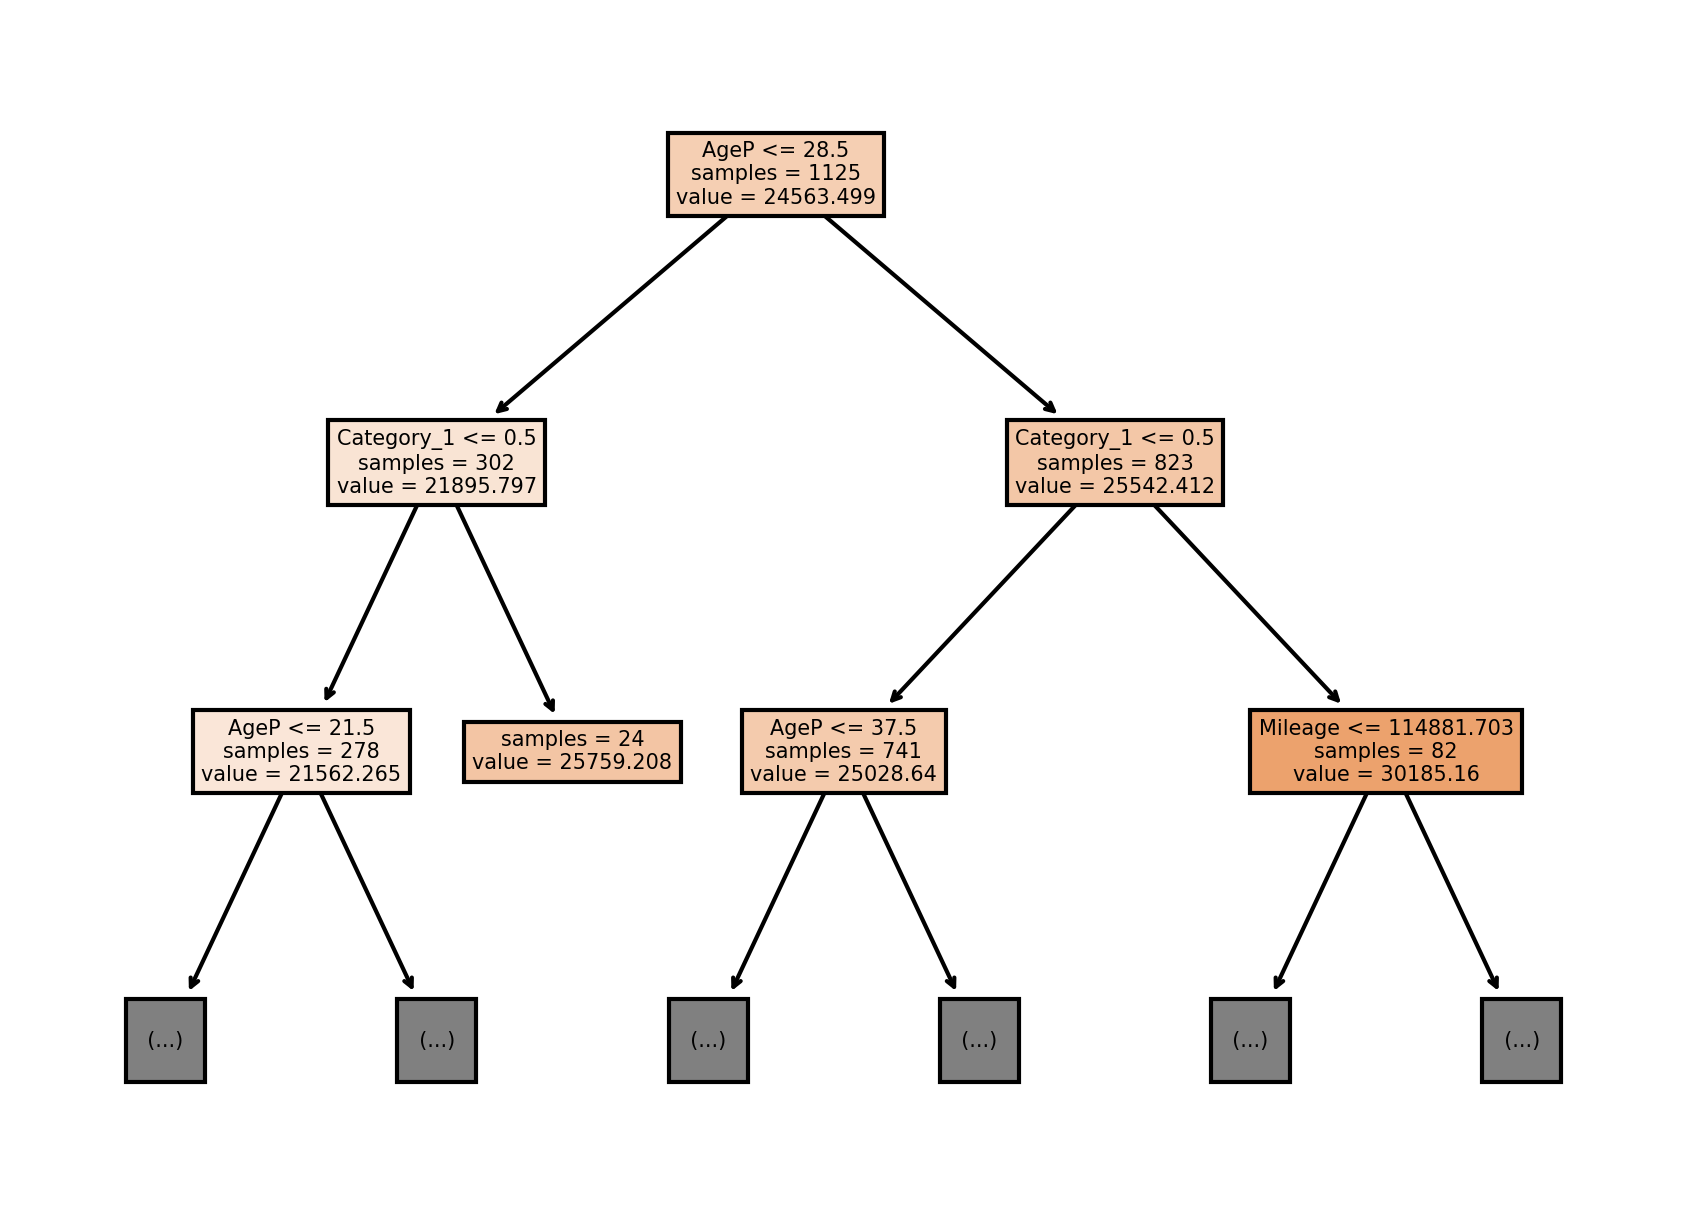

In [40]:
# Show the first few levels of the tree
plt.figure(figsize=[7,5], dpi=300)
plot_tree(reg4, max_depth=2,
          feature_names=list(X_train.columns), 
          filled=True,impurity=False)
plt.show()

#

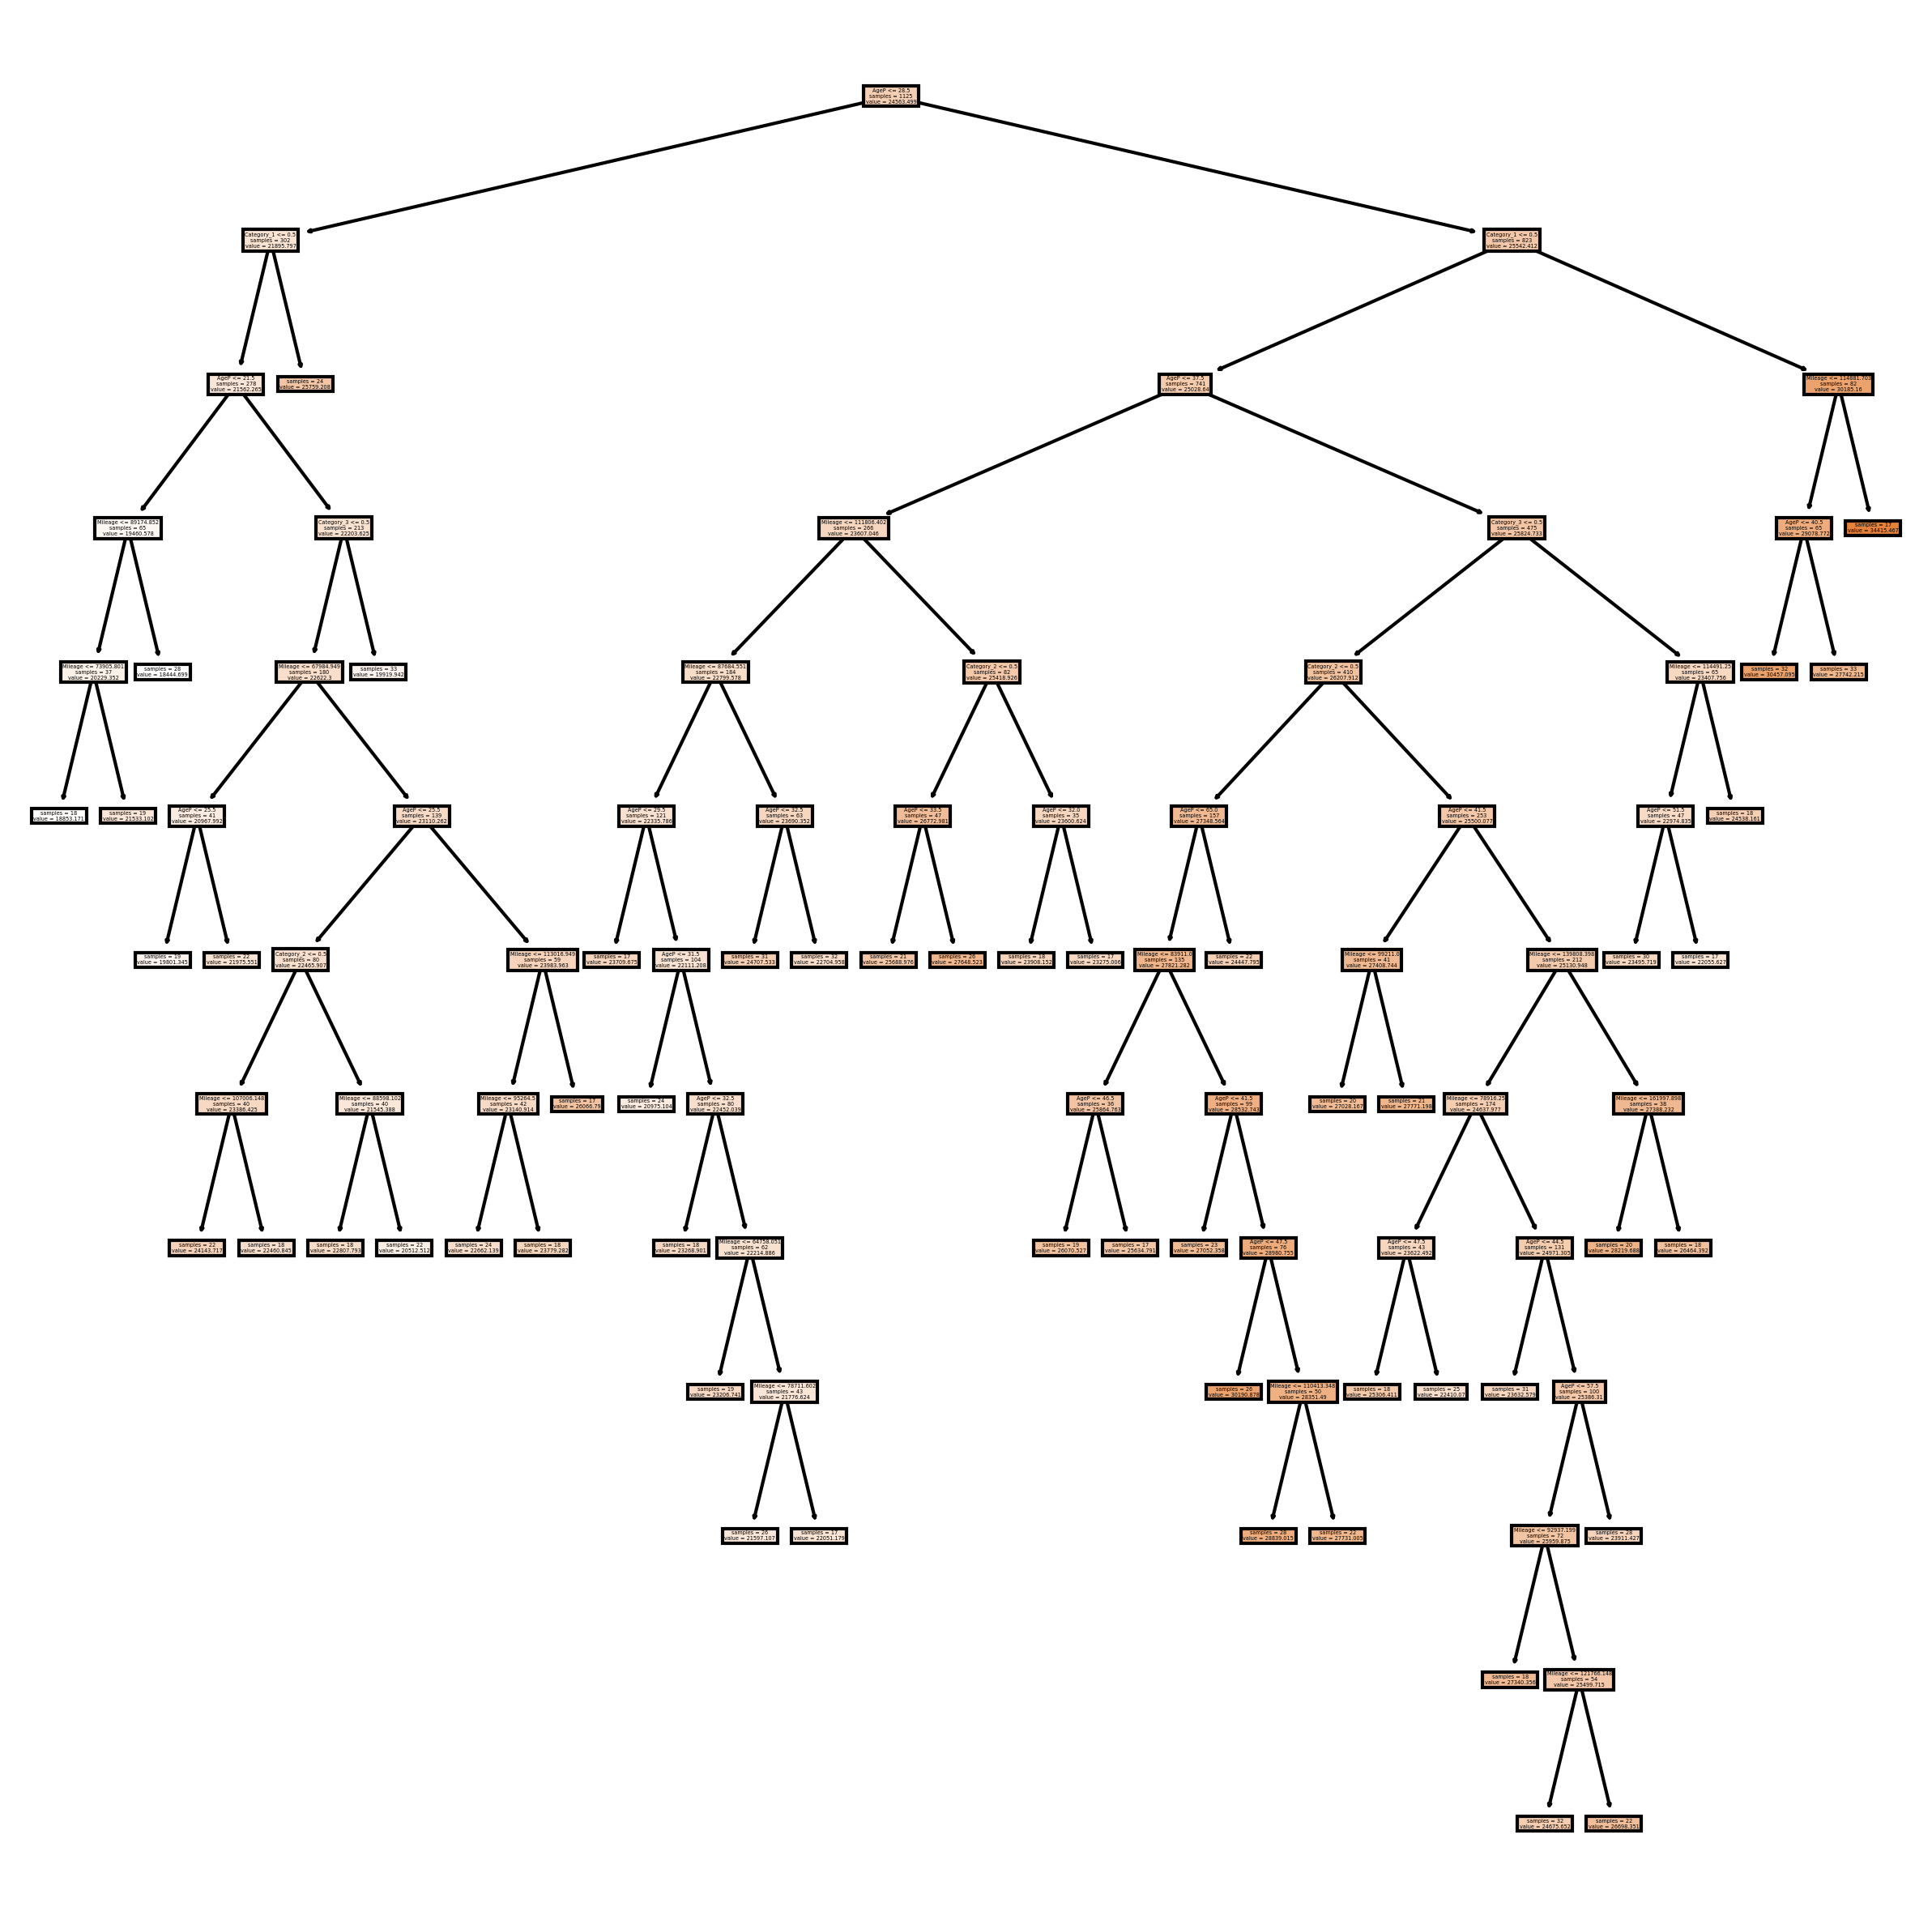

In [41]:
# Save the plot as an image to read the information in the nodes
plt.figure(figsize=[10,10], dpi=300)
plot_tree(reg4, 
          feature_names=list(X_train.columns), 
          filled=True,impurity=False)
 
plt.savefig('ClaimsDataSet_tree.png');

In [42]:
# Final test to see how the model performs: 
# Assign the MSE to the variable name "error2"
### BEGIN SOLUTION
y_pred = reg4.predict(X_test)
error2 = mean_squared_error(y_pred, y_test)
### END SOLUTION


print("MSE before pruning = %s"%(error))
print("MSE of the optimal tree = %s"%(error2)) 

# This mean squared error is approximately half the unpruned tree's mean squared error

MSE before pruning = 52969205.268238395
MSE of the optimal tree = 28925023.07601886


In [43]:
# What is the final model to be used for predictions in future? 
# Set random_state=0
### BEGIN SOLUTION
best_model = DecisionTreeRegressor(random_state=0, min_samples_leaf=17)
best_model.fit(X, y)

print("Tree depth =",best_model.get_depth(),'\n'
      "Number of leaves =",best_model.get_n_leaves())
### END SOLUTION

Tree depth = 13 
Number of leaves = 70


# 

#### In the insurance industry regulatory laws need to be considered. The model needs to be interpretable so that they can provide prospective clients with direct reasons for premium amounts

#### Looking at the first couple of splits of the decision tree, one of the insights that is interesting is that drivers younger than 28.5 have slightly lower mean claim amounts than drivers older than 28.5. Older drivers may have older cars, which are more likely to break down. Younger drivers could also be driving cheaper cars, so their claim amount is lower.

#### Then for example, if the mileage is <= 111,806, then the partition mean for claim amount is 22,799 ZAR. If the mileage is greater than 111,806 km, then the mean claim amount is 25,418 ZAR. So cars with larger mileage have higher claim amounts. So owners of older cars should have higher premiums, as they are likely to make larger claims.



# 

# 

# 

# 

#

#

## PART 2: UNSUPERVISED LEARNING

## 2.1 Import and explore the basic characteristics of the  fitness tracker data set

In [50]:
# Import libraries
# General 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# For clustering algorithms
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# K-means clustering
from sklearn.cluster import KMeans

# Agglomerative hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [51]:
# Import data and print the shape of the data
df = pd.read_csv("FitnessTrackerData.txt",delimiter=" ")
print(df.shape)

(300, 3)


#### The dataset consist of three hundred rows of records and three features.

#

In [52]:
# Explore the type of data and feature names
df.sample(8)

,Pace,Distance,Frequency
8,4.706941,12.349913,1.838356
2,4.646827,11.787426,2.355195
91,4.890382,11.900299,2.540350
298,4.801810,9.669608,1.001325
297,5.354185,10.488521,1.237018
139,4.574521,15.207397,2.523349
225,4.875967,9.557790,1.098186
219,5.476508,10.406271,1.045532


In [53]:
# For consistency, make the data X
X = df.copy()

### 2.2 Plot the data

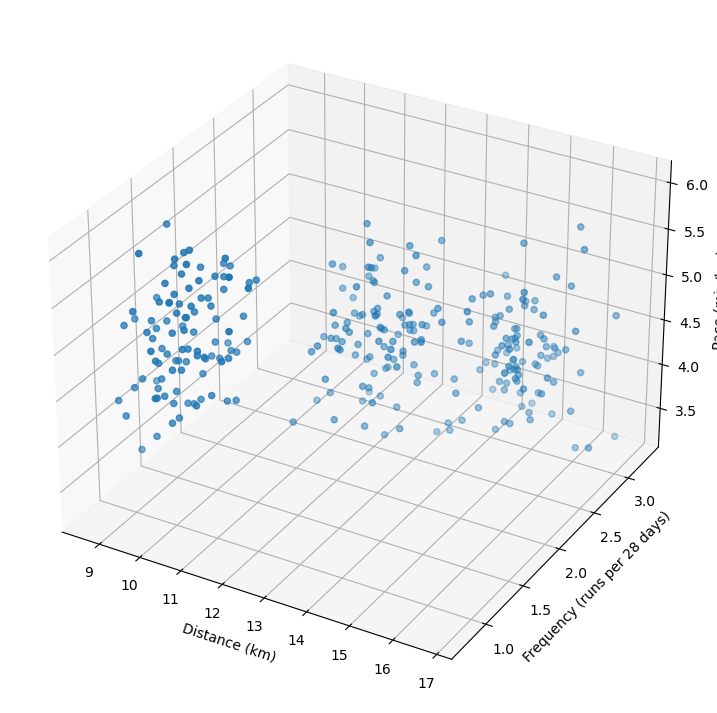

In [54]:
# Plot a three-dimensional plot of the data
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection="3d")

x_points = X.loc[:,"Distance"]
y_points = X.loc[:,"Frequency"]
z_points = X.loc[:,"Pace"]

ax.set_xlabel("Distance (km)")
ax.set_ylabel("Frequency (runs per 28 days)")
ax.set_zlabel("Pace (min/km)")

ax.scatter3D(x_points, y_points, z_points);

plt.show()

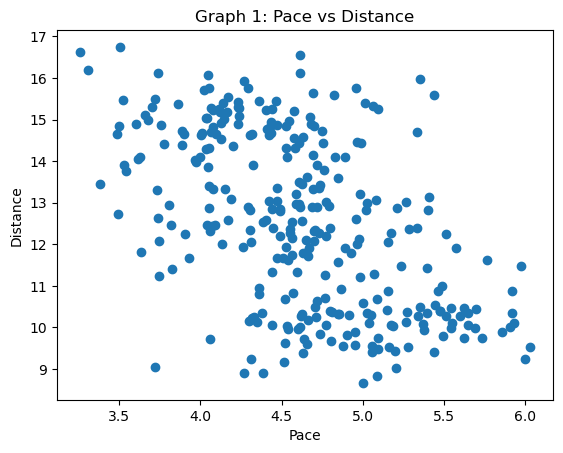

In [55]:
# Plot Pace vs Distance
plt.scatter(X.loc[:,"Pace"],X.loc[:,"Distance"])
plt.title('Graph 1: Pace vs Distance')
plt.xlabel('Pace')
plt.ylabel("Distance")
plt.show()

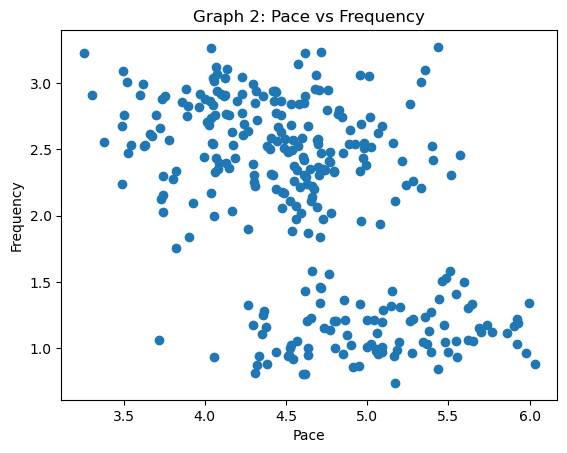

In [56]:
# Plot Pace vs Frequency
plt.scatter(X.loc[:,"Pace"],X.loc[:,"Frequency"])
plt.title('Graph 2: Pace vs Frequency')
plt.xlabel('Pace')
plt.ylabel('Frequency')
plt.show()

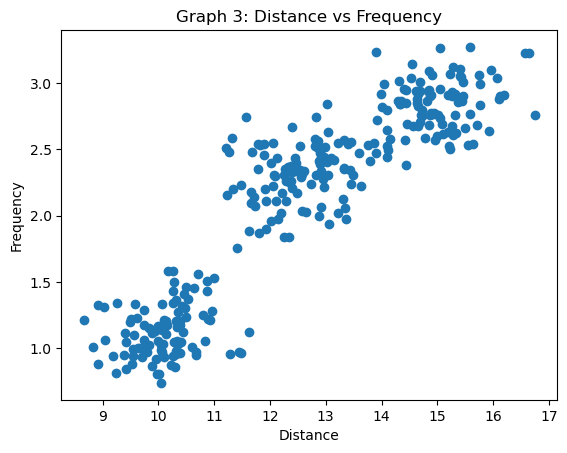

In [57]:
# Plot Distance vs Frequency
plt.scatter(X.loc[:,"Distance"],X.loc[:,"Frequency"])
plt.title('Graph 3: Distance vs Frequency')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

**Make some inferences about the data**
1. Are there any patterns you can identify in Graph 1: Pace vs Distance for different groups of runners? 
2. By visually inspecting Graph 2 and Graph 3, how many clusters do you think there are?

### 2.3 K-means clustering

Refer to the Module 6 IDE activities to guide you in performing K-means clustering.

#### 2.3.1 Find the optimal number of clusters

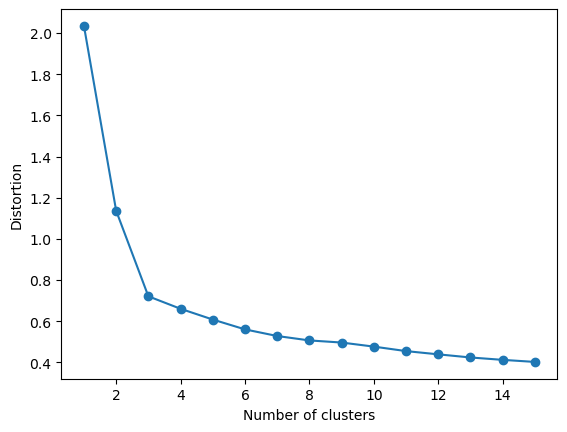

In [9]:
# 1. Elbow method 
# Calculate distortions 
# Set random_state=0 and use init='k-means++'
distortions = []
### BEGIN SOLUTION
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, 
                max_iter=300,tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(sum(np.min(cdist(X, km.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0])
### END SOLUTION

# Plot distortions
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\kefiw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kefiw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kefiw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kefiw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

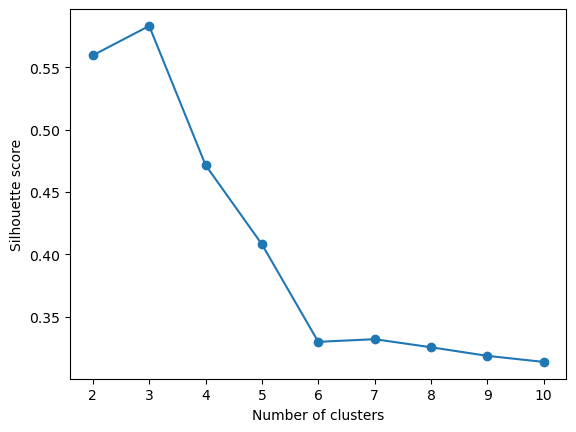

In [10]:
# 2. Silhouette method 
sil = []
kmax = 10
### BEGIN SOLUTION
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))
### END SOLUTION

# Plot
plt.plot(range(2, kmax+1), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

#### 2.3.2 Cluster the data using the scikit-learn K-means algorithm

In [45]:
# Cluster the data 
# Hint: km = KMeans(....,init='k-means++', random_state=0)
### BEGIN SOLUTION
km = KMeans(n_clusters=3, init='k-means++', 
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
km.fit(X) 
### END SOLUTION

KMeans(n_clusters=3, n_init=10, random_state=0)

In [46]:
# Add the cluster labels to the dataframe 
# Set random_state=0
### BEGIN SOLUTION
Xnew = X.copy()
Xnew["CLUSTERS"] = km.labels_
Xnew.sample(8, random_state=0)
### END SOLUTION

,Pace,Distance,Frequency,CLUSTERS
208,5.734379,9.749187,1.175090,1
188,4.164663,15.184689,2.630416,0
12,4.551373,12.282242,2.262886,2
221,5.065831,11.281043,0.959691,1
239,4.765949,10.701846,1.560003,1
136,4.318200,14.652788,2.936755,0
230,5.393464,11.439544,0.975832,1
206,4.863134,10.926031,1.217446,1


#### 2.3.3 Plot the clusters generated by the K-means algorithm

C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\kefiw\anaconda3\Lib\site-p

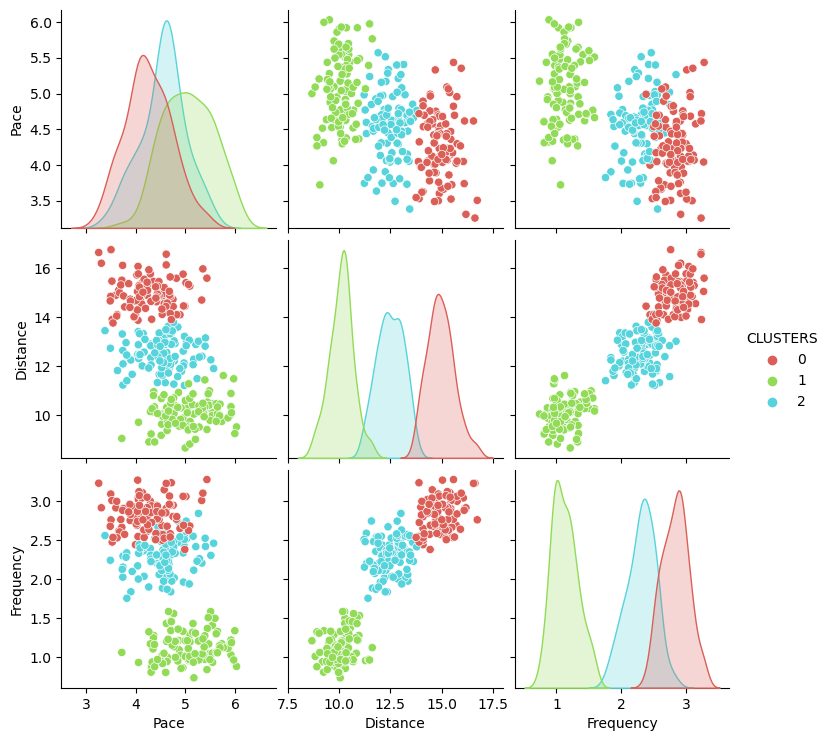

In [47]:
# Plot all variables and their clusters using seaborn 
### BEGIN SOLUTION
var = ['Pace', 'Distance',
       'Frequency']

sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 4))
### END SOLUTION

In this part of the activity, you used the elbow method and the silhouette score to determine how many clusters to use for K-means clustering, clustered the data, and plotted the results. What insights can you gain from the pair-wise plots for this data set?

### 2.4 Hierarchical clustering

Refer to the Module 7 IDE activities to guide you in performing hierarchical clustering.

#### 2.4.1 Find the optimal number of clusters
Compare two linkage methods to each other. Choose from this list: `“ward”`, `“complete”`, `“average”`, `“single”`. 

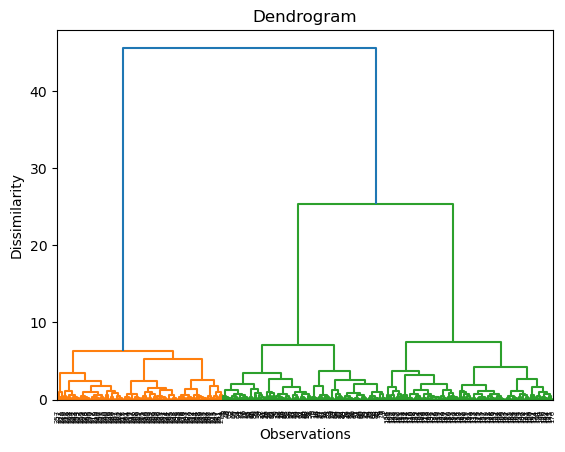

In [48]:
# Plot the dendrogram with your first choice of linkage method 
# Hint: Use dendrogram()
### BEGIN SOLUTION
dendro = dendrogram(linkage(X, method  = "ward"))
### END SOLUTION

# Note that it may take a while for this graph to be generated
plt.title('Dendrogram')
plt.ylabel('Dissimilarity')
plt.xlabel('Observations')
plt.show()

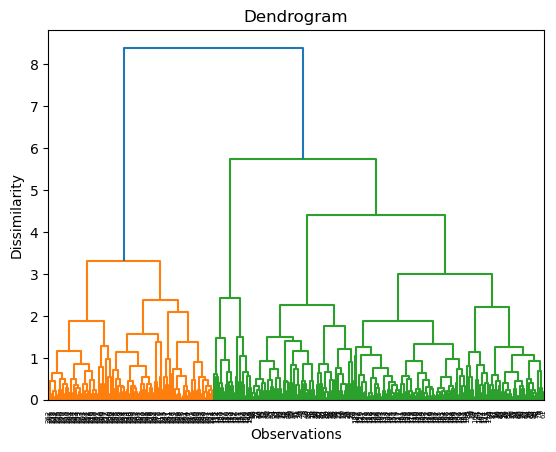

In [49]:
# Plot the dendrogram with your second choice of linkage method 

### BEGIN SOLUTION
dendro = dendrogram(linkage(X, method  = "complete"))
### END SOLUTION

# Note that it may take a while for this graph to be generated
plt.title('Dendrogram')
plt.ylabel('Dissimilarity')
plt.xlabel('Observations')
plt.show()

* Were there differences in the dendrogram depending on the linkage method you used?
* How many clusters do you think should be specified?

#### 2.4.2 Cluster the data using the scikit-learn `AgglomerativeClustering` algorithm

**Group the data into two clusters**

In [50]:
# Run the agglomerative clustering algorithm using two clusters and the linkage method of your choice 
# Hint: n_clusters=2
### BEGIN SOLUTION
hc = AgglomerativeClustering(n_clusters = 2, linkage ='ward')
y_hc=hc.fit_predict(X)
### END SOLUTION

In [51]:
# Set up dataframe with cluster labels 
# Set random_state=0
### BEGIN SOLUTION
Xnew = X.copy()
Xnew["CLUSTERS"] = y_hc
Xnew.sample(10, random_state=0)
### END SOLUTION

,Pace,Distance,Frequency,CLUSTERS
208,5.734379,9.749187,1.175090,1
188,4.164663,15.184689,2.630416,0
12,4.551373,12.282242,2.262886,0
221,5.065831,11.281043,0.959691,1
239,4.765949,10.701846,1.560003,1
136,4.318200,14.652788,2.936755,0
230,5.393464,11.439544,0.975832,1
206,4.863134,10.926031,1.217446,1
52,4.981272,11.215898,2.508583,0
108,4.755913,14.431425,2.945011,0


In [52]:
Xnew.isnull().sum()

Pace         0
Distance     0
Frequency    0
CLUSTERS     0
dtype: int64

**Plots with two clusters**

C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\kefiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\kefiw\anaconda3\Lib\site-p

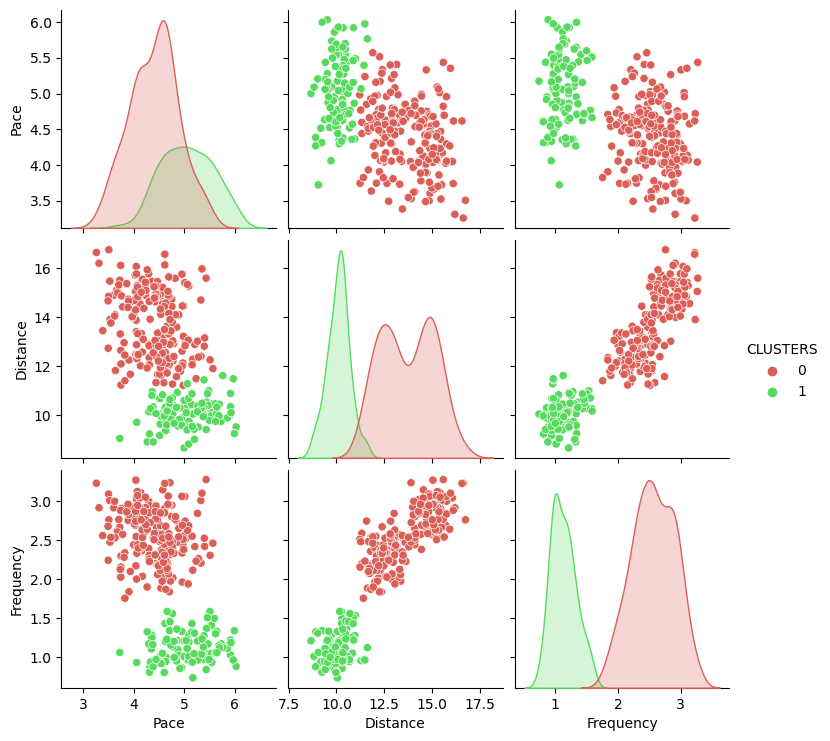

In [53]:
# Plot all the variables and their clusters using seaborn 
### BEGIN SOLUTION
var = ["Pace", "Distance", "Frequency"]
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 3))
### END SOLUTION

**Group the data into three clusters**

In [54]:
# Run the agglomerative clustering algorithm using three clusters and the linkage method of your choice 
# Hint: n_clusters=3
### BEGIN SOLUTION
hc = AgglomerativeClustering(n_clusters = 3, linkage ='ward')
y_hc=hc.fit_predict(X)
### END SOLUTION

In [55]:
# Set up dataframe with cluster labels 
# Set random_state=0
### BEGIN SOLUTION
Xnew = X.copy()
Xnew["CLUSTERS"] = y_hc
Xnew.sample(10, random_state=0)
### END SOLUTION

,Pace,Distance,Frequency,CLUSTERS
208,5.734379,9.749187,1.175090,1
188,4.164663,15.184689,2.630416,0
12,4.551373,12.282242,2.262886,2
221,5.065831,11.281043,0.959691,1
239,4.765949,10.701846,1.560003,1
136,4.318200,14.652788,2.936755,0
230,5.393464,11.439544,0.975832,1
206,4.863134,10.926031,1.217446,1
52,4.981272,11.215898,2.508583,2
108,4.755913,14.431425,2.945011,0


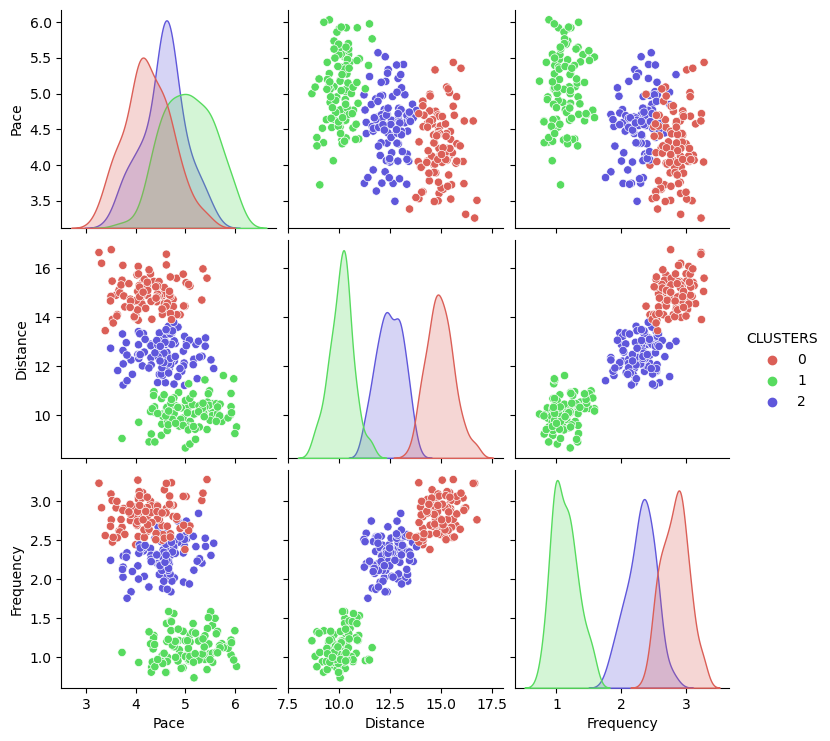

In [56]:
# Plot all the variables and their clusters using seaborn 
### BEGIN SOLUTION
var = ["Pace", "Distance", "Frequency"]
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 3))
### END SOLUTION

In this part of the activity, you created a dendrogram, clustered the data, and plotted the data with clusters. Do you think two or three clusters is more appropriate? Is there a difference between the K-means plot and the hierarchical clustering plots you generated? 